# ১: লিনিয়ার রিগ্রেশন
এই অধ্যায়ে আমরা মেশিন লার্নিংয়ের সবচেয়ে মৌলিক অ্যালগরিদমগুলোর একটি শিখব।

আমার বিশ্বাস, যেকোনো নতুন জিনিস শেখার আগে আমাদের প্রথমে জানা উচিত আমরা এটা কেন শিখছি, এটা কী ধরনের সমস্যা সমাধান করতে পারে, এবং এটা আমাদের জীবনে কীভাবে সাহায্য করতে পারে।

এই অধ্যায়েও আমরা ঠিক এই নিয়মটিই অনুসরণ করব। চলুন, প্রথমে একটি বাস্তব জীবনের সমস্যা দেখি।

# ১.১: সমস্যা: জমির দাম অনুমান করা

ধরুন, আপনার ঢাকার গুলশানের কিছু জমির আকার (square feet) এবং সেগুলোর দাম (price) জানা আছে।
| জমির আকার (square feet) | দাম (price) |
|---------------------------|-------------|
| 2522                      | 77400000    | 
| 2200                      | 67000000    |
| 2635                      | 83000000    |
| 2034                      | 60000000    |
| 2760                      | 90000000    |
| 1800                      | 56500000    |

চলুন আমরা এই জমি গুলোর দাম একটা গ্রাফে প্লট করি।

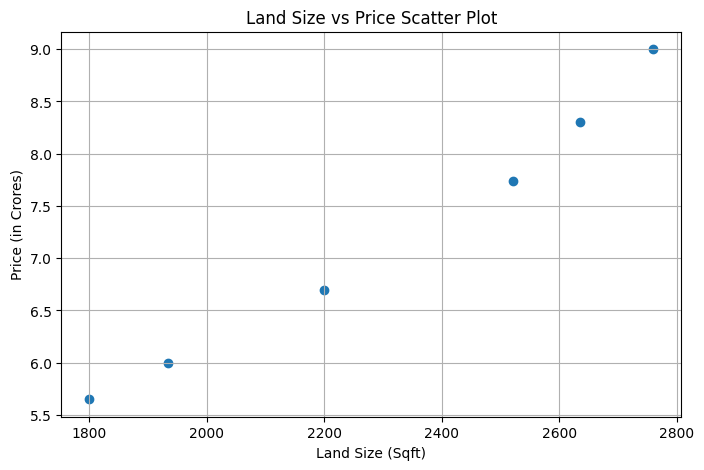

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# ডেটা 
data = {
    'size_sqft': [2522, 2200, 2635, 1934, 2760, 1800],
    'price': [77400000, 67000000, 83000000, 60000000, 90000000, 56500000]
}
df = pd.DataFrame(data)

# দামকে 'কোটি'-তে রূপান্তর করি, যাতে গ্রাফে সংখ্যাগুলো সহজে বোঝা যায়
df['price_crore'] = df['price'] / 1_00_00_000

# স্কেটার প্লট
plt.figure(figsize=(8, 5)) # গ্রাফের আকার ঠিক করা
plt.scatter(df['size_sqft'], df['price_crore'])

# গ্রাফের লেবেল এবং টাইটেল
plt.title("Land Size vs Price Scatter Plot")
plt.xlabel("Land Size (Sqft)")
plt.ylabel("Price (in Crores)")
plt.grid(True) # গ্রাফে গ্রিড যোগ করা

# প্লটটি দেখান
plt.show()

গ্রাফটির দিকে তাকালেই আমরা একটি মজার জিনিস দেখতে পাচ্ছি। ডেটা পয়েন্টগুলো এলোমেলোভাবে ছড়িয়ে ছিটিয়ে নেই। বরং, দেখে মনে হচ্ছে এগুলো মোটামুটি একটি সরলরেখা (straight line) অনুসরণ করছে।

এখন, যদি আপনার কাছে একটি নতুন জমির আকার দেওয়া হয়, যেমন 2000 square feet, তাহলে কি আপনি অনুমান করতে পারবেন যে এর দাম কত হতে পারে?

আপনি যদি ৬ থেকে সাড়ে ৬ কোটির মধ্যে অনুমান করে থাকেন, তাহলে আপনি সঠিক অনুমান করেছেন। 

আমরা পরিষ্কার দেখতে পাচ্ছি যে, জমির আকার যত বাড়ছে, দামও তত বাড়ছে।

মেশিন লার্নিংয়ের ভাষায়, জমির আকার এবং দামের মধ্যে এই সম্পর্কটিকে আমরা একটি 'লিনিয়ার' বা রৈখিক সম্পর্ক বলতে পারি।

আমাদের কাজ হলো ঠিক এই সম্পর্কটিকেই একটি গাণিতিক 'লাইন' দিয়ে প্রকাশ করা। যদি আমরা এমন একটি সেরা লাইন খুঁজে বের করতে পারি যা আমাদের ডেটা পয়েন্টগুলোর ঠিক মাঝখান দিয়ে যায়, তাহলে সেই লাইনটি ব্যবহার করেই আমরা 2000 স্কয়ার ফিট জমির দাম কত হতে পারে তা অনুমান (predict) করতে পারব।

মেশিন লার্নিংয়ের ভাষায়, এই "সেরা" লাইনটিকে আমরা বেস্ট-ফিট লাইন (Best Fit Line) বলি।

আর এই বেস্ট-ফিট লাইনটি খুঁজে বের করার প্রক্রিয়াটিকেই বলা হয় লিনিয়ার রিগ্রেশন (Linear Regression)।

যেহেতু এই লাইনটি আমাদের নতুন জমির দাম অনুমান (predict) করতে সাহায্য করে, তাই আমরা এই লাইনটিকেই একটি "মডেল" (Model) বলেও ডাকি।

# ১.২: "সেরা" লাইনটি আসলে কী?
আমরা বুঝলাম যে আমাদের এমন একটি সরলরেখা দরকার যা সব ডেটা পয়েন্টের মাঝখান দিয়ে যায়। কিন্তু "মাঝখান দিয়ে যাওয়া" বা "সেরা" লাইন বলতে আমরা ঠিক কী বোঝাচ্ছি?

যেমন, নিচের গ্রাফে দেখুন। তিনটি ভিন্ন লাইন (লাল, সবুজ, নীল) আঁকা হয়েছে। কোনটি "সেরা"?

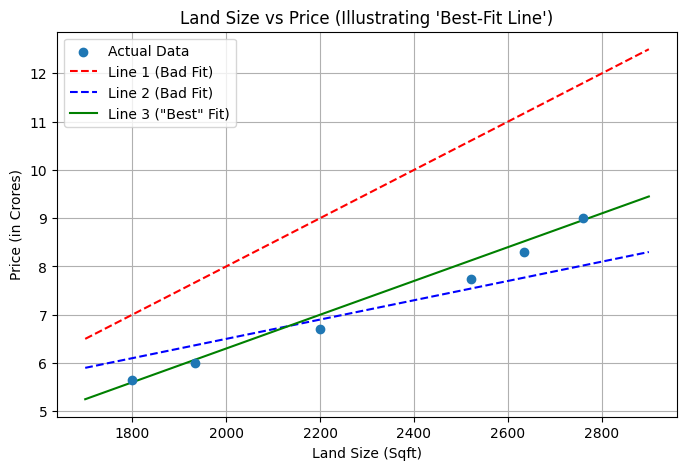

In [34]:
import numpy as np

# Create an x-axis range for the lines
# We use a slightly wider range (1700-2900) to show the lines clearly
x_fit = np.array([1700, 2900])

# Define the three lines (y = mx + c)
# You can adjust these m and c values to see how the lines change!
# Line 1: Bad fit (red, too steep)
y_red = lambda x: 0.005 * x - 2.0
# Line 2: Bad fit (blue, too shallow)
y_blue = lambda x: 0.002 * x + 2.5
# Line 3: Good fit (green, just right)
y_green = lambda x: 0.0035 * x - 0.7

# --- Start plotting ---

plt.figure(figsize=(8, 5))

# Plot the original scatter plot
# We use zorder=5 to make sure the dots are "on top" of the lines
plt.scatter(df['size_sqft'], df['price_crore'], label='Actual Data', zorder=5)

# Plot the three lines
plt.plot(x_fit, y_red(x_fit), color='red', linestyle='--', label='Line 1 (Bad Fit)')
plt.plot(x_fit, y_blue(x_fit), color='blue', linestyle='--', label='Line 2 (Bad Fit)')
plt.plot(x_fit, y_green(x_fit), color='green', linestyle='-', label='Line 3 ("Best" Fit)')

# Set labels and title
plt.title("Land Size vs Price (Illustrating 'Best-Fit Line')")
plt.xlabel("Land Size (Sqft)")
plt.ylabel("Price (in Crores)")
plt.grid(True)

# Add legend to explain which line is which
plt.legend()

# Show the plot
plt.show()

চোখ দিয়ে দেখে আমরা হয়তো বলতে পারি যে সবুজ লাইনটিই সবচেয়ে ভালো। কিন্তু একটি কম্পিউটারকে আমরা কীভাবে বোঝাব যে সবুজ লাইনটিই সেরা?

কম্পিউটারকে এটি বোঝানোর জন্য, আমাদের একটি গাণিতিক উপায় বের করতে হবে, যা দিয়ে আমরা পরিমাপ করতে পারব যে একটি লাইন _কতটা ভালো_ বা _কতটা খারাপ_।

### ভুলের (Error) পরিমাপ
আমরা খুব সহজ একটি কাজ করতে পারি। আমরা প্রতিটি ডেটা পয়েন্ট (যেমন, 2522 sqft) থেকে আমাদের আঁকা লাইনটি পর্যন্ত খাড়া দূরত্ব (vertical distance) পরিমাপ করতে পারি। এই দূরত্বটিকেই আমরা "ভুল" বা Error বলি।
:::{math}
:name: eq:error_definition_bn

\text{Error} = \text{আসল দাম} - \text{লাইনের অনুমান করা দাম}
:::

Equation [](#eq:error_definition_bn) দেখতে ফরমাল না। চলুন, আমাদের এই ভুলের হিসাবটিকে ফরমাল গাণিতিক ভাষায় প্রকাশ করি।
- যেকোনো "আসল দাম" (actual price), যা আমাদের ডেটাসেটে আছে, তাকে আমরা $y$ (ওয়াই) বলব।
- আমাদের লাইনটি যে "অনুমান করা দাম" (predicted price) দেবে, তাকে আমরা $\hat{y}$ (ওয়াই-হ্যাট) বলব।

:::{note} "হ্যাট" (Hat) নোটেশন কী?
:class: dropdown
গণিত এবং পরিসংখ্যানের জগতে, যখনই আমরা কোনো কিছুর "অনুমান করা" বা "প্রেডিক্টেড" মান বোঝাই, আমরা সেটির ওপর একটি "টুপি" বা "হ্যাট" ( $\hat{}$ ) চিহ্ন বসিয়ে দিই।
- $y$ হলো আসল, প্রকৃত মান।
- $\hat{y}$ হলো $y$-এর অনুমান করা বা মডেলের দেওয়া মান।
:::
এই নতুন নোটেশন ব্যবহার করে, আমরা আমাদের ভুলের সমীকরণটিকে আরও সুন্দরভাবে লিখতে পারি:

:::{math}
:name: eq:error_definition
  
\text{Error} = y - \hat{y}
:::

যদি একটি লাইন সব পয়েন্টের খুব কাছ দিয়ে যায়, তবে তার মোট ভুলের পরিমাণ কম হবে। আর যদি কোনো লাইন পয়েন্টগুলো থেকে অনেক দূর দিয়ে যায় (যেমন উপরের লাল লাইনটি), তবে তার মোট ভুলের পরিমাণ অনেক বেশি হবে।

স্বাভাবিকভাবেই, যে লাইনের জন্য মোট ভুলের পরিমাণ সবচেয়ে কম হবে, সেটিই আমাদের "বেস্ট-ফিট লাইন"।

চলুন, আমাদের আগের তিনটি লাইনের (সবুজ, লাল ও নীল) জন্য এই ভুলগুলো ($y - \hat{y}$) কেমন দেখায়, তা গ্রাফে পাশাপাশি তুলনা করে দেখি।

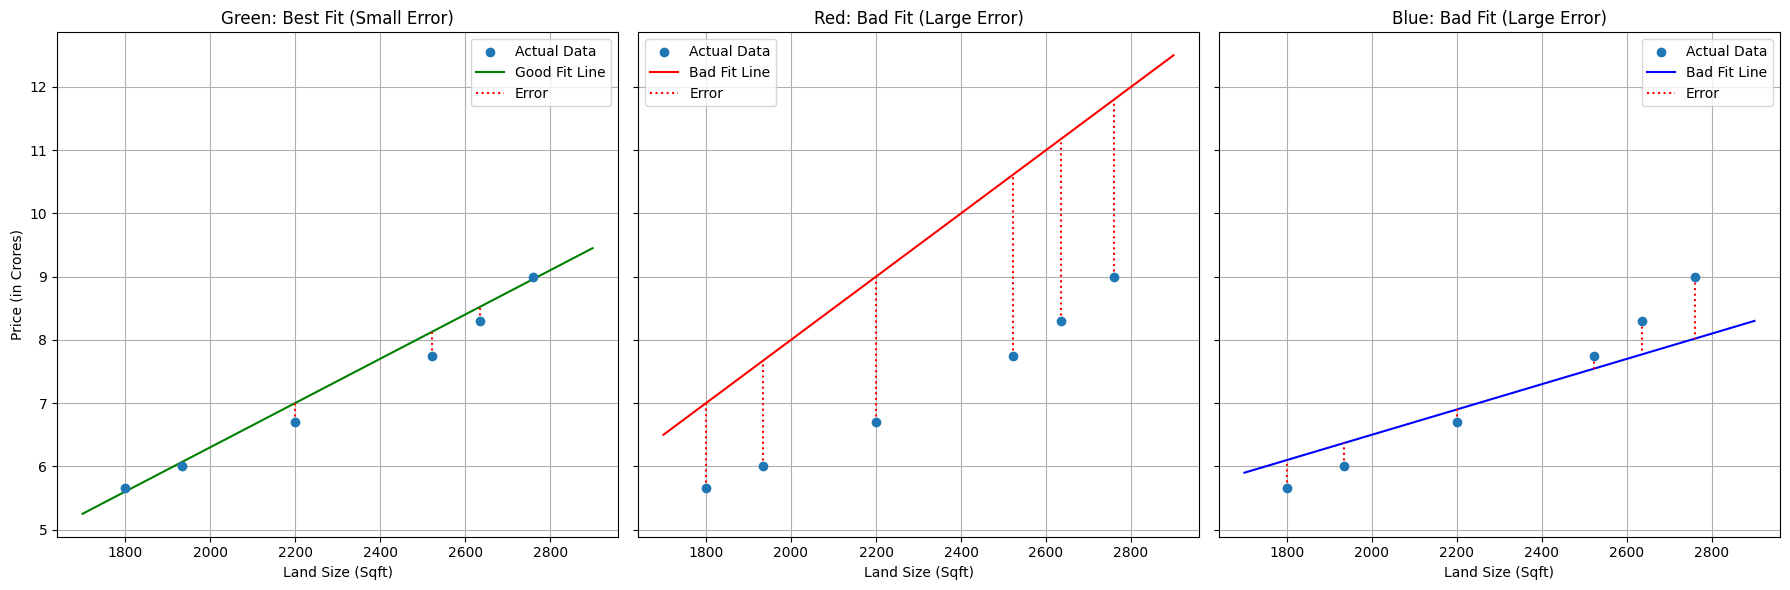

In [45]:
# --- Define your lambda functions ---
y_red = lambda x: 0.005 * x - 2.0
y_blue = lambda x: 0.002 * x + 2.5
y_green = lambda x: 0.0035 * x - 0.7

# Our actual data from the DataFrame
x_actual = df['size_sqft']
y_actual = df['price_crore']

# A common x-axis for plotting the lines
x_fit = np.array([1700, 2900])

# --- Create the 1x3 subplot grid ---
# sharey=True is key for a fair visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# --- Plot 1: Green Line (Good Fit) ---
ax = axes[0]
y_pred_green = y_green(x_actual) # Call the lambda function

ax.scatter(x_actual, y_actual, label='Actual Data', zorder=5)
ax.plot(x_fit, y_green(x_fit), color='green', label='Good Fit Line') # Call the lambda
ax.vlines(x_actual, y_actual, y_pred_green, color='red', linestyles='dotted', label='Error')
ax.set_title('Green: Best Fit (Small Error)')
ax.set_xlabel('Land Size (Sqft)')
ax.set_ylabel('Price (in Crores)')
ax.legend()
ax.grid(True)

# --- Plot 2: Red Line (Bad Fit) ---
ax = axes[1]
y_pred_red = y_red(x_actual) # Call the lambda function

ax.scatter(x_actual, y_actual, label='Actual Data', zorder=5)
ax.plot(x_fit, y_red(x_fit), color='red', label='Bad Fit Line') # Call the lambda
ax.vlines(x_actual, y_actual, y_pred_red, color='red', linestyles='dotted', label='Error')
ax.set_title('Red: Bad Fit (Large Error)')
ax.set_xlabel('Land Size (Sqft)')
ax.legend()
ax.grid(True)

# --- Plot 3: Blue Line (Bad Fit) ---
ax = axes[2]
y_pred_blue = y_blue(x_actual) # Call the lambda function

ax.scatter(x_actual, y_actual, label='Actual Data', zorder=5)
ax.plot(x_fit, y_blue(x_fit), color='blue', label='Bad Fit Line') # Call the lambda
ax.vlines(x_actual, y_actual, y_pred_blue, color='red', linestyles='dotted', label='Error')
ax.set_title('Blue: Bad Fit (Large Error)')
ax.set_xlabel('Land Size (Sqft)')
ax.legend()
ax.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()

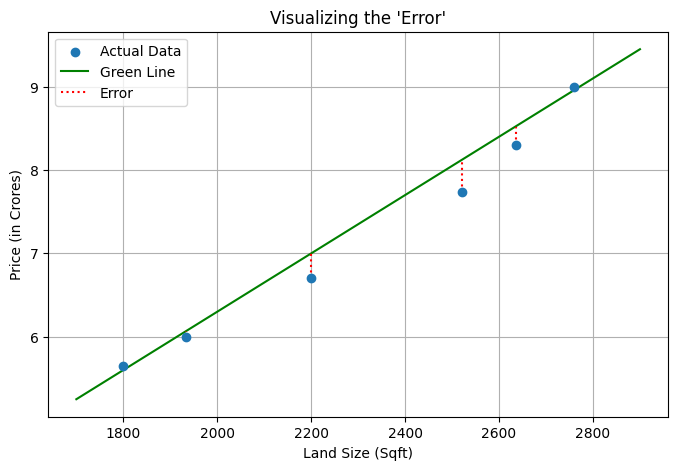

In [36]:
# Calculate the "predicted" y value for each actual x value
y_predicted = y_green(df['size_sqft'])

# --- Start plotting ---
plt.figure(figsize=(8, 5))

# Plot the original scatter plot
plt.scatter(df['size_sqft'], df['price_crore'], label='Actual Data', zorder=5)

# Plot the "best-fit" line
plt.plot(x_fit, y_green(x_fit), color='green', linestyle='-', label='Green Line')

# Plot the vertical error lines (residuals)
# This draws a vertical line from y_actual to y_predicted for each x_actual
plt.vlines(df['size_sqft'], ymin=df['price_crore'], ymax=y_predicted, linestyles='dotted', label='Error', color='red')

# Set labels and title
plt.title("Visualizing the 'Error'")
plt.xlabel("Land Size (Sqft)")
plt.ylabel("Price (in Crores)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

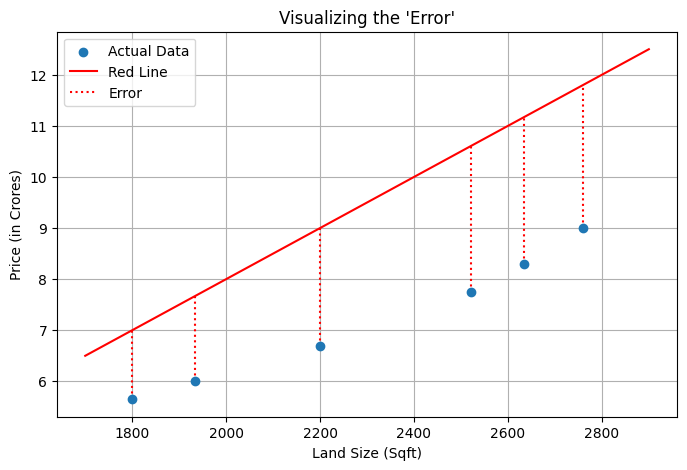

In [37]:
# Calculate the "predicted" y value for each actual x value
y_predicted = y_red(df['size_sqft'])

# --- Start plotting ---
plt.figure(figsize=(8, 5))

# Plot the original scatter plot
plt.scatter(df['size_sqft'], df['price_crore'], label='Actual Data', zorder=5)

# Plot the "best-fit" line
plt.plot(x_fit, y_red(x_fit), color='red', linestyle='-', label='Red Line')

# Plot the vertical error lines (residuals)
# This draws a vertical line from y_actual to y_predicted for each x_actual
plt.vlines(df['size_sqft'], ymin=df['price_crore'], ymax=y_predicted, linestyles='dotted', label='Error', color='red')

# Set labels and title
plt.title("Visualizing the 'Error'")
plt.xlabel("Land Size (Sqft)")
plt.ylabel("Price (in Crores)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

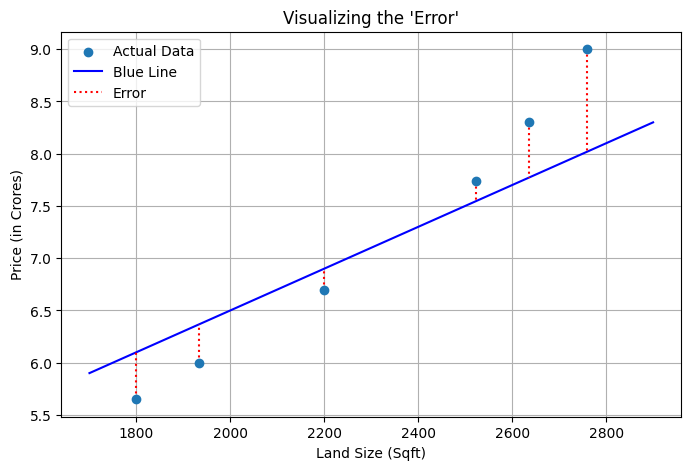

In [38]:
# Calculate the "predicted" y value for each actual x value
y_predicted = y_blue(df['size_sqft'])

# --- Start plotting ---
plt.figure(figsize=(8, 5))

# Plot the original scatter plot
plt.scatter(df['size_sqft'], df['price_crore'], label='Actual Data', zorder=5)

# Plot the "best-fit" line
plt.plot(x_fit, y_blue(x_fit), color='blue', linestyle='-', label='Blue Line')
  
# Plot the vertical error lines (residuals)
# This draws a vertical line from y_actual to y_predicted for each x_actual
plt.vlines(df['size_sqft'], ymin=df['price_crore'], ymax=y_predicted, linestyles='dotted', label='Error', color='red')

# Set labels and title
plt.title("Visualizing the 'Error'")
plt.xlabel("Land Size (Sqft)")
plt.ylabel("Price (in Crores)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()